**<font size="6">Decision-Tree Classifier</font>**

# Entropy
* consider a binary classification problem
    * consider 3 features $f_1, f_2 and f_3$
    * ID-3 algorithm is to be used, so that a proper attribute can be chosen for a split to be caused at each node, w.r.t. a feature $f_i$
    * entropy is used for this selection process
* Entropy: measures the purity of the split
* aim of a decision tree algorithm is to arrive at the leaf node as quickly as possible
    * leaf nodes definitionally are those nodes in a decision tree that have samples belonging to a single class.
    * hence, at a leaf node *pure split* is guaranteed.
* Entropy: $\textrm{H(s)} = -p_+ log(p_+)-p_- log(p_-)$, + = positive class, - = negative class(this is obviously for binary classification), log to the *base 2*.
    * $p_+$ = % of positive samples, $p_-$ = % of negative samples
    * s: the node at which a split will happen.
    * observe that at a leaf node having only + samples, $p_+ = 1, p_- = 0 \Rightarrow H(s) = -1log(1) -0log(0) = 0+ \lim_{x \to 0} \frac{log(x)}{1/x} = \lim_{x \to 0}\frac{1/x}{-1/x^2} \textrm{( L'Hospital's rule )} = 0 +  \lim_{x \to 0} -x = 0 $ 
    * observe that for a node that splits the sample into 2 halves, i.e.  $p_+ = p_- = 0.5 \Rightarrow H(s) = -0.5log(0.5) -0.5log(0.5) = -log(0.5) = log(2) = 1$
    * so, worst case: $H(s) = 1$, best case: $H(s) = 0$    
    * Assume the following built decision tree: \
    <img src="dtree-1.png" />
        * at root node, feature $f_1$ was used to split the dataset.
            * also, at root node, we had 14 samples, with 9 belonging to +, 5 to -.
            * hence, $H(root) =  -p_+log(p_+) -p_{-}log(p_{-})$ = $-\frac{9}{14}log_2\left(\frac{9}{14}\right) - \frac{5}{14}log_2\left(\frac{5}{14}\right) = 0.94 $
        * whatever was the splitting criterion at root node, using feature $f_1$ caused the left child to have 3+ and 2- samples, and the right child node to have 6+ and 3- samples
            * so, $H(root->left) =  -p_+log(p_+) -p_{-}log(p_{-})$ = $-\frac{3}{5}log_2\left(\frac{3}{5}\right) - \frac{2}{5}log_2\left(\frac{2}{5}\right) = 0.97 $
            * and, $H(root->right) =  -p_+log(p_+) -p_{-}log(p_{-})$ = $-\frac{6}{9}log_2\left(\frac{6}{9}\right) - \frac{3}{9}log_2\left(\frac{3}{9}\right) = 0.92 $
        * <font color="red">No</font> represents that the splitting criterion was not met by that subgroup of samples, <font color="green">Yes</font> means it was. **this doesn't mean that the samples got labelled**
            - the splitting criterion could be , say $f_1 == \textrm{'toy'}$.
* **the above formulae** for entropy was for **binary classification**:
    * **for multi-class classification**, it becomes $\textrm{H(s)} = -\sum\limits_{c=1}^{C} p_c log_2(p_c)$, C: total number of classes.
    * at a node, $p_c = $ no. of samples of class c/total no. of samples at that node
    * for best split, $p_c= 1 \,\,,\,\, p_{\ne c} = 0 \Rightarrow H(s) = 0 $
    * for the worst split, $p_c = \frac{1}{C} \forall c \, \epsilon \, 1,2,\cdots C \Rightarrow H(s) = -\sum\limits_{c=1}^C \frac{1}{C} log_2(\frac{1}{C}) = -log_2\frac{1}{C} = log_2(C)$
    * so for a **classification** problem of **C classes**, **maximum entropy** = $log_2(C)$
* after splitting at a non-leaf node, we may not immediately reach the leaf nodes, hence may require more intermediate splitting
    * for this intermediate splitting to occur, we may require certain attributes
    * hence the entropy at these intermediate parent nodes have to be also taken into account
    * this is done via **information gain**
    
* using a splitting criterion based on $f_1$ (like say is $f_1 == \textrm{'toy'}$ ), and say out of these 14 samples, 9 samples had $f_1 == \textrm{'toy'}$, and 5 didn't
                * this means that the decision tree using this node will 
             the dataset was split s.t. one partition had 9 samples belonging to the + class, 5 to the - class 
            * similarly, at the left-child of root node, feature $f_2$ was used to split all the 5 samples that were passed into it. it split these 5 s.t. 3 went to its left child, 2 to the right

# Information gain

* $gain(s, A) = H(s) - \dfrac{|s|_{left}}{|s|}H(s_{left}) - \dfrac{|s|_{right}}{|s|}H(s_{right})$
    * all three terms are related to which particular splitting criterion was chosen at node $s$.
    * A - feature used to split at the current node
    * $|s|$: dataset size at node $s$, $|s_{left}|$: dataset node arriving at left node of $s$ after splitting at $s$, $|s_{right}|$: dataset node arriving at right node of $s$ after splitting at $s$

* for the above example, gain(root, A) = 0.94 - $\left[\frac{5}{14}\left(-\frac{3}{5}\textrm{log}_2\left(\frac{3}{5}\right) -\frac{2}{5}\textrm{log}_2\left(\frac{2}{5}\right) \right) + 
\frac{9}{14}\left(-\frac{3}{9}\textrm{log}_2\left(\frac{3}{9}\right) -\frac{6}{9}\textrm{log}_2\left(\frac{6}{9}\right) \right)\right]$ = 0.94 - 0.35 - 0.18 = 0.41
  * so the informational gain at the root node when using feature $f_1$ for splitting was **0.41**

* a decision tree is built by splitting the dataset at each node using all features and all kinds of splitting criterion per feature, s.t. for each of these
  * at root node, we already know the entropy as that's decided by the class-distribution in the given dataset
  * now each feature is chosen, and for each feature, each split criterion is used to calculate the split of the subset of samples at root node (which is basically the entire dataset)
    * assume we have a criterion on feature $f_2$, say $f_2 == 'car'$, s.t. out of these 14 samples, 
      * 5+ samples say Yes, 4+ samples say no, 3- samples say Yes, 2- samples say No.
      * hence, the left node (<font color="red">No</font>) has 2- samples and 4+ samples, and the right node (<font color="green">Yes</font>) has 3- samples and 5+ samples
      * for this splitting criterion, $H(s_{left}) = -\frac{2}{6}log_2\left(\frac{2}{6}\right) - \frac{4}{6}log_2\left(\frac{4}{6}\right) = 0.92$, $H(s_{right}) = -\frac{3}{8}log_2\left(\frac{3}{8}\right) - \frac{5}{8}log_2\left(\frac{5}{8}\right) = 0.95 $
      * $H(root, f_2 == 'car') = H(root) -\dfrac{|s|_{left}}{|s|}H(s_{left}) - \dfrac{|s|_{right}}{|s|}H(s_{right}) = 0.94 - ((6/14)\times 0.92) - ((8/14)\times 0.95) = 0.94 - 0.39 - 0.54 = 0.94 - 0.93 = 0.01$
      * so splitting at root using the criterion $f_2 == 'car'$ yields an information gain of 0.01, which is shit. Compare this with the split using $f_1$, which gave 0.41
  * once we exhaust all feature criterion and find the one with the highest information gain, we fix it, s.t. it will cause some P samples to be in the left child and $N-P$ in the right child
  * this process will now be **recursively repeated**, till we arrive at (create) a node with entropy = 0, i.e. a pure split.
  * this process *returns* (recursion ends) at a pure split node.
  * **Note: splitting till we arrive at a pure split node is just a theoretical concept**
    - in practical settings, the tree might grow too deep trying to attain that.
    - also , this could cause the tree to **overfit tremendously**.
    - **see the Pre-pruning** section to know how a decision tree growth is capped.
* within the **ID3  algorithm** (Iterative Dichotomiser, introduced by **Ross Quinlan in 1986**)
  - the splitting happens for each unique value of a feature, thus creating no. of nodes = no. of unique feature values for that particular feature
  - the information gain then becomes $gain(s, A) = H(s) - \sum\limits_v \dfrac{|s|_v}{|s|}H(s_v) \,\,,\,\, \textrm{ where } v \textrm{ = each unique value of feature A being used for split}$ 
  - hence, **ID3** ends up **creating** a multi-way tree, i.e. an **n-ary tree**.
  - this is naturally a greedy approach of building the decision tree.
  - even for numerical variables, the ID3 algorithm will create no. of nodes = no. of unique feature values, thus making **ID3 computationally intensive** in the presence of **numerical variables** in the dataset.
  - hence, its said that ID3 doesn't handle numerical variables.
  - because of creating an n-ary tree, the algorithm is **memory intensive** as well.

# C4.5 

1. C4.5 is the successor to ID3 , hence is also an n-ary tree creator.
2. **Modification over ID3**: uses **information gain ratio** over information gain.
    1. I.G. is defined the same as that used in ID3.
    2. I.G.R. = $\dfrac{I.G.}{\left(-\sum\limits_{v \epsilon Values} \dfrac{|s_v|}{|s|} log_2\left(\frac{|s_v|}{|s|}\right)\right)}$
        1. don't get confused, the denominator term is not the same as the 2nd term in I.G.
        2. the denominator is called the split entropy, i.e. $H_{split}(A)$
2. **Modification over ID3**: handles numerical variables by using a threshold for binary splitting
    1. say a numerical feature has 1000 unique values, $v_1, v_2, \cdots v_{1000}$
    2. C4.5 evaluates the midpoints in between: $m_i = \dfrac{v_i + v_{i+ 1}}{2} \,\,,\,\, \forall \,\, i \, \epsilon 1\,,2\,, \cdots 999$
    3. for each of this 999 midpoints
        1. the **binary splitting** criterion $f > m_i$ is assumed and the **information gain ratio** is calculated
        2. obviously these 999 criterion are judged against criterion from other categorical and numerical features as well.
        3. if at the end a numerical variable gets chosen, then the binary split at that midpoint value will take place.
    1. say bins for a numerical feature(v1) are b1 = 0 <= v1 <= 10, b2 = 20 < v1 <= 30 .... 
    2. instead of v1, b1 will be used to create the said n-ary tree

2. C4.5 inference is same as ID3's inference: given a sample to be predicted, traverse the tree starting from the root to determine which class should be predicted for the sample.
3. Handling Missing values
    1. 
4. Capable of multi-class classification unlike ID3.
5. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.
    - <font color="red">C4.5 uses a statistical test (like the error rate) to decide whether a subtree can be replaced by a leaf node.</font>

# Gini impurity

1. G.I. = 1 - $\sum\limits_{i=1}^{n_{classes}}p_c^2$

2. this is to be calculated at a splitting node, similar to entropy calculation

3. pure split, entropy = 0, and G.I. = 1 - ($1^2+0^2 + 0^2...$) = 0

4. worst split: when all classes of the dataset have equal no. of samples, entropy = $log_2(C)$, and G.I. = $1 - \sum\limits_{c=1}^C (1/C)^2  = 1 - C.\frac{1}{C^2} = 1 - \frac{1}{C}$

5. hence, for a **classification problem** with **C classes**, **entropy** ranges from **0 to $log_2(C)$**, and **G.I.** ranges from **0 to $1-\frac{1}{C}$**.

5. this is used, in lieu of entropy, in models such as RandomForest and other ensemble techniques, since **it is computationally more efficient**

    1. in calculating entropy, apart from the multiplications, additions and subtraction operations, we **also** have the **log function** to be **computed**
    
    2. whereas in Gini impurity, only division, addition and subtraction are the main operations involved.
    
6. Information gain using Gini Impurity is calculated in the exact same manner as it was while using entropy

# Remaining Tree Algos

CART → (Classification And Regression Tree)\
CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)\
MARS → (multivariate adaptive regression splines)

# CART - Classification and Regression Trees
- implemented by scikit-learn
- splits are always binary
- uses gini impurity OR entropy to determine the best split (G.I. is default in sklearn)
    - remember in ID3, $I.G.(s, A) = H(s) - \dfrac{|s|_{left}}{|s|}H(s_{left}) - \dfrac{|s|_{right}}{|s|}H(s_{right})$
    - the 2nd term represents the weighted sum of entropy of child nodes
    - this is what's evaluated for a given feature split in CART, and the splitting criterion with the minimum value of this weighted sum of G.I./Entropy is chosen
    - think about it, minimizing y in x-y is same as maximising (x-y).
- for **regression trees**
    - Variance reduction is used as the split criterion
    - in regression tasks, predicted output = mean(target variable over the subset of samples in the current node)
    - Variance(Curr Node) = $\frac{1}{N} \sum\limits_{i=1}^{n_{samples\_curr\_node}} (y_i - \bar{y})^2$
    - Variance(Left Node) = $\frac{1}{N_{left}} \sum\limits_{i=1}^{n_{samples\_left\_node}} (y_i - \bar{y}_{left})^2$
    - Variance(Right Node) = $\frac{1}{N_{right}} \sum\limits_{i=1}^{n_{samples\_right\_node}} (y_i - \bar{y}_{right})^2$
    - Variance Reduction = Variance(Curr Node) - $\left(\frac{N_{left}}{N}\right)$ Variance(Left Node) - $\left(\frac{N_{right}}{N}\right)$ Variance(Right Node)
- the `sklearn.DecisionTreeClassifier` and `sklearn.DecisionTreeRegressor` is the CART algorithm
- how are categorical variables handled?
    - aren't *handled* by the sklearn implementations, they expect the feature matrix to be entirely numerical
    - hence we have to handle encoding at our end
    - for a feature with small no. of categories, one-hot encoding can easily be used
- IS the handling of categorical variables different from numerical variables? **w.r.t. CART in sklearn**
    - **nope**, exact same.
    - for any kind of feature, CART simply calculates the unique midpoints and then uses these midpoints as binary threshold values
        - say a feature has only 2 unique values, 0 and 1. threshold = 0.5, criterion = is feature > 0.5
        - say a feature has 10 unique values, 0 through 9. no. of midpoints = 9, from 0.5 to 8.5, hence no. of thresholds to test = 9.
            - criterion = is feature > 0.5 , OR
            - is feature > 1.5 OR
            - is feature > 8.5 ....
    - the underlying decision tree models of `sklearn.RandomForestXXX` and `sklearn.GradientBoostingXXX` are sklearn's DecisionTreeXXX implementations, i.e. CART trees.
- how does it handle categorical variables with too many categories?
    - you have to encode that categorical feature into numerical ones, as previously stated.
    - target encoding
        - if its already known that the categories have some order amongst them
        - if there are really too many categories, s.t. most likely whether they are ordinal or not is unknown, then target encoding would impart a ranking amongst them.
        - target encoding computes the mean value of the target variable per category, and that's the new feature, i.e. the encoding of this categorical feature.
        - makes sense even when the predictand (dependent variable) is binary: 0 and 1.
        - doesn't make sense when the predictand (dependent variable) is multi-class with no ordering amongst its classes.
    - or target-guided encoding
        - used when its already known that a categorical feature is ordinal.
        - calculate mean of target per category.
        - rank the categories w.r.t. these per-category dependent variable mean values.
            - could be the highest one is the highest ranked, or the lowest one is the highest ranked.
- <font color="red">the DecisionTree base model in [xgboost](https://xgboost.readthedocs.io/en/stable/) package implements a different algorithm than this traditional CART.</font>
- <font color="red">able to handle numerical variables, and regression tasks better than ID3 and C4.5. How?</font>

# Minimal Cost-Complexity Pruning
- pruning used in sklearn's decision trees
- Cost complexity of pruning a subtree under a node = Error Rate(entire training set) + $\alpha \times $ (No. of terminal nodes in the subtree to be pruned)
    - Then, for each subtree you evaluate for pruning, you calculate the error rate of the tree as it would look if that specific subtree were removed (i.e., after pruning).
    - if after pruning, the error rate jumps, a big no no. we don't want such a pruned tree, hence it will have a high cost complexity.
    - similarly, if after pruning the error rate increases slightly (or even better if it decreases), but the subtree has too many leaves, it could be a sign of being overfit (overgrown) at the time of training.
        - think about it, since the training set is used for cost complexity pruning, and training set was also used for making the tree as well.
        - if the same dataset that built that huge subtree is now saying that "Meh!, removing it won't cause much harm 
- The pruning process is iterative in nature, meaning at each iteration, one subtree is pruned, and the tree becomes progressively simpler. 
    - The algorithm looks at the whole tree and evaluates the effect of pruning one subtree at a time, but after pruning, it will consider the modified tree (now simpler) for the next pruning decision.
* The process will go something like this:
    * You start with the fully grown tree, and after calculating the cost-complexity for each possible subtree, you decide which one to prune.
    * In the early stages, smaller subtrees are pruned first, because they provide the best balance of low complexity and minimal error increase.
    * However, the pruning continues iteratively, so by the time the algorithm evaluates larger subtrees(ones which were earlier large, now might have been reduced due to their subtree's subtree being chopped), the tree has already been simplified. 
- Practical usage:
    ```python
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    # Example dataset
    X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=42)

    # Fit the model
    dt.fit(X_train, y_train)

    # Get the pruning path
    path = dt.cost_complexity_pruning_path(X_train, y_train)

    # Find the best alpha value (this could be done via cross-validation)
    ccp_alphas = path.ccp_alphas
    impurity = path.impurities

    # Select an optimal alpha and prune the tree
    optimal_ccp_alpha = ccp_alphas[np.argmin(impurity)]  # You can use validation here instead
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
    dt_pruned.fit(X_train, y_train)

    # Evaluate the pruned tree
    print(f"Accuracy on test set: {dt_pruned.score(X_test, y_test)}")

    ```

# Pruning in decision trees

1. 2 main types
    1. pre-rpuning
    2. post pruning
    
## Pre-pruning

1. pre-pruning or early stopping involves stopping the tree before it has grown so much so that all leaf nodes are pure splits
    - this could be an overfit tree because the tree has been allowed to have so many splits

2. try and stop the tree-building process early, before it produces leaves with very small samples. 

3. at each splitting stage, check the cross-validation error, if it hasn't reduced by a significant value, stop expanding the tree

4. Practically seen how?
    - sklearn's implementation has certain hyperparameters that stop further growth of the tree
    - `min_impurity_split`: only splits if at least 1 splitting criterion is found at the current node where the weighted sum of child node impurities cross this threshold
        - if no split is found, this node is labelled as a leaf node
    - `max_depth`: if a node is at a certain depth, no subtree will be added to it
    - `max_leaf_nodes`: grow the tree till no. of nodes = `max_leaf_nodes`
    - `min_samples_split`: current node must have at least these many samples to be eligible for experiencing a split.
    - `min_samples_leaf`: for a split criterion, both the children nodes should end up with at least these many samples.
        - if say n_samples in current node = 10, `min_samples_split` = 2 and `min_samples_leaf` = 2 , such that all possible feature splitting criterion at this node result in one child receiving 9 samples and the other 1 sample, no split will occur at this node. \
        This node will be marked as a leaf node.
    - `min_weight_fraction`: by default this is 0
        - normalized sum of sample weights at this node should be at least this much so that this node qualifies as a leaf node
        - if say `min_weight_fraction` = 0.3, and say the sum of sample weights at this node's to-be-left-child = 20, but if sum of weights of all training samples = 100, then `min_weight_fraction` will rule out such a split.
        - both the right and left child nodes should have a weight fraction (sum of weights of samples landing up in them / sum of weights of all training samples) at least `min_weight_fraction` or else no split at the current node, which will be marked as a leaf node.

4. **Disadvantage:** may underfit by stopping too early. 


## Post-pruning
1. post-pruning refers to pruning the tree after it has finished.

2.  After a tree has been built it may be overfitted.

3. the decision tree may be built at full depth, which results in training samples individually acting as nodes.

4. pruning strategies

    1. **Minimum error == cost-complexity == weakest link**. 
    
        1. The tree is pruned back to the point where the cross-validated error is a minimum.
            1. one algo suggests to do k-fold cross validation, i.e. build a tree k times, for each iteration and then prune and thus have k pruned-trees, seems completely dumb.
            2. another only does this once, hence having a single pruned tree, which still seems better.
            3. the logic is the same, for a given non-leaf node, if making it a leaf, i.e. eliminating the subtree its a parent of gives a lesser or equal cross-validation error () 
        
        2. Cross-validation is the process of building a tree with most of the data and then using the remaining part of the data to test the accuracy of the decision tree.
        
        3. can occur in top-down or bottom-up manner, i.e. pruning starts from the root of the tree, or at its leaves.
    
    2. **Smallest tree**. 
    
        1. The tree is pruned back slightly further than the minimum error. 
        
        2. Technically the pruning creates a decision tree with cross-validation error within 1 standard error of the minimum error. 
        
        3. The smaller tree is more intelligible(bias-variance tradeoff, bias being the CV error) at the cost of a small increase in error.


* **Post pruning decision trees is more mathematically rigorous, finding a tree at least as good as early stopping. Early stopping is a quick fix heuristic.**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [3]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8811188811188811

## Visualising the decision tree

[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

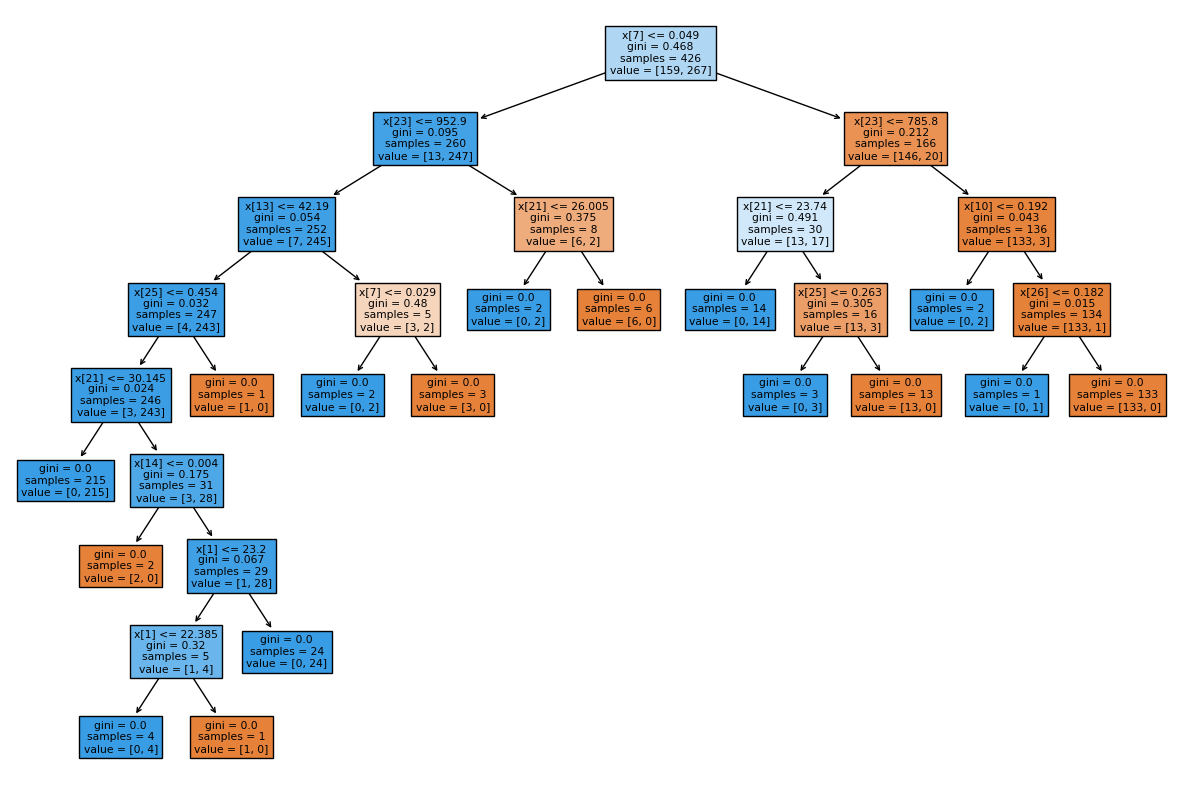

In [4]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)

## Cost-complexity pruning

In [5]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# ccp_alphas = a list containing costs at each level of the tree
# impurities = a list containing impurities at each level of the tree

In [8]:
len(ccp_alphas), impurities, ccp_alphas

(13,
 array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352]),
 array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]))

In [11]:
clf.get_depth(), clf.get_n_leaves()

(8, 16)

In [14]:
clf.tree_.compute_node_depths(), clf.tree_.node_count

(array([1, 2, 3, 4, 5, 6, 6, 7, 7, 8, 9, 9, 8, 5, 4, 5, 5, 3, 4, 4, 2, 3,
        4, 4, 5, 5, 3, 4, 4, 5, 5]),
 31)

In [23]:
path.values()

dict_values([array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844]), array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])])

In [6]:
clf = []
for ccp_alpha in ccp_alphas:
    clfCurr = DecisionTreeClassifier(
        random_state=0,
        ccp_alpha=ccp_alpha
    )
    clfCurr.fit(x_train, y_train)
    clf.append(clfCurr)
    
print("Number of nodes in the last tree is", clf[-1].tree_.node_count, " with ccp alpha as", ccp_alphas[-1])

Number of nodes in the last tree is 1  with ccp alpha as 0.3272984419327777


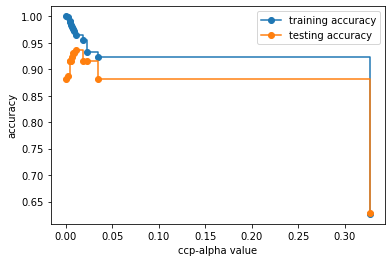

In [7]:
train_scores = [clfCurr.score(x_train, y_train) for clfCurr in clf]
test_scores = [clfCurr.score(x_test, y_test) for clfCurr in clf]

fig, ax = plt.subplots()
ax.set_xlabel("ccp-alpha value")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, label="training accuracy", marker='o', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, label="testing accuracy", marker='o', drawstyle='steps-post')
plt.legend()
plt.show()

<font size="5">Take the ccp-alpha value with best testing accuracy</font>

In [8]:
import numpy as np
best_clf = clf[np.argmax(test_scores)]
best_ccp = ccp_alphas[np.argmax(test_scores)]
print(best_ccp, accuracy_score(best_clf.predict(x_test), y_test))

0.011443661971830986 0.9370629370629371


[Text(418.5, 713.475, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 509.625, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 305.775, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 305.775, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 509.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 305.775, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 101.92499999999995, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 101.92499999999995, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 305.775, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

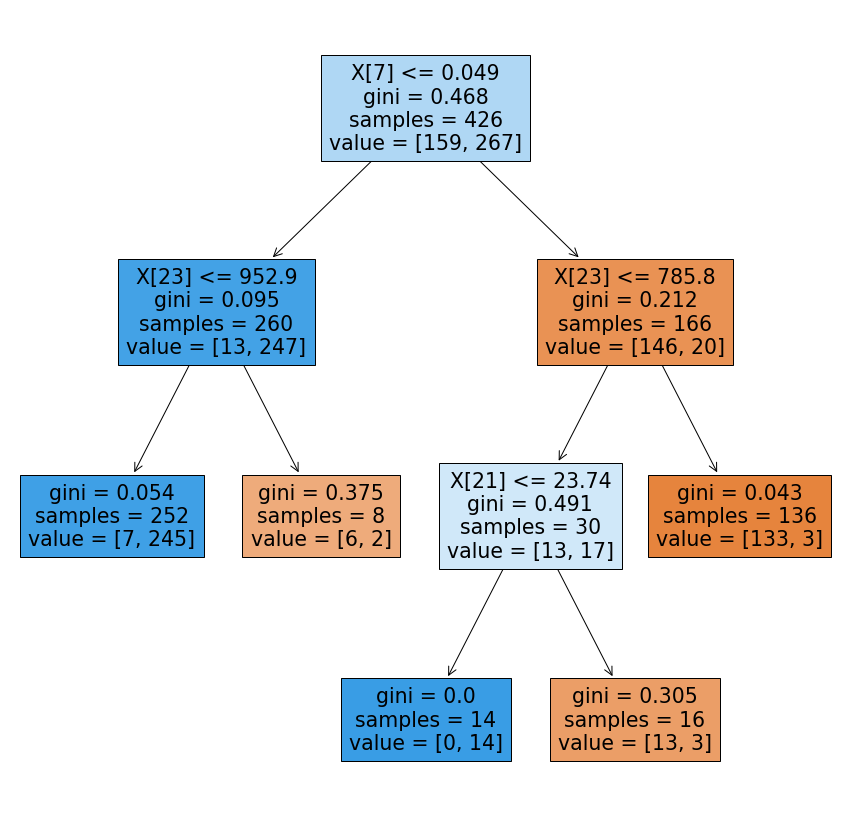

In [9]:
plt.figure(figsize=(15, 15))
tree.plot_tree(best_clf, filled=True)

# Warm start a decision tree classifier
- continue training an already trained classifier using new-data
- will only be possible if the original model when being initialised had `warm_start = True`

## Evaluation metric for regression trees

1. the `sklearn.tree.DecisionTreeRegressor` object has a method called `.score()` that gives an **R$^2$** as its output, when supplied with validation data and its output

2. this is called **coefficient of determination**, and is pronounced as "r-squared"

3. sum of squared residuals is calculated:
    
    1. SS$_{\textrm{tot}}$(total sum of squares) = $\sum\limits_{i=1}^N \left(y^{(i)} - \bar{y} \right)^2$ , where $\bar{y} = \frac{1}{N}\sum\limits_{i=1}^N y^{(i)}$
    
    2. SS$_{\textrm{res}}$(sum of squared residuals) = $\sum\limits_{i=1}^N \left(y^{(i)} - \hat{y}^{(i)} \right)^2$
    
3. R$^2$ = 1 - $\frac{SS_{\textrm{res}}}{SS_{\textrm{tot}}}$

4. best case, SSR = 0, hence R$^2$ = 1, if SSR too large, it may exceed SST, thus producing <font color="red"> negative R$^2$ values</font>

In [10]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeRegressor as DTR

# lets try without pruning
dtr = DTR(
    criterion="mae",
    splitter="random",
    random_state=0
)

dtr.fit(x_train, y_train)

print("Accuracy = ", dtr.score(x_test, y_test))
print("Depth of the tree hence built is:", dtr.get_depth())
print("Number of leaves are:", dtr.get_n_leaves())

Accuracy =  0.6608156968174702
Depth of the tree hence built is: 19
Number of leaves are: 363


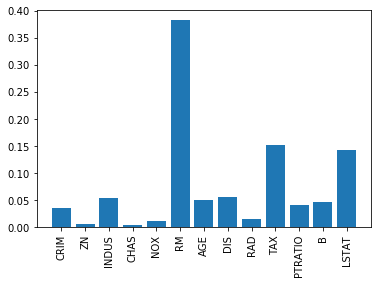

In [12]:
%matplotlib inline
plt.bar([i for i in range(len(dtr.feature_importances_))], dtr.feature_importances_)
plt.xticks(np.arange(len(dtr.feature_importances_)), labels=load_boston().feature_names, rotation='vertical')
plt.show()

# Pruning <font color="red">Regression</font> Trees

1. cost-complexity pruning

    1. calculate sum of squared residuals(SSR) at each parent node, i.e where splitting occurs
    
    2. sum these node-wise SSR to get the total SSR
    
    3. now calculate this total SSR, after cutting off the last level of nodes, i.e. pruning the last levels, i.e. bottom-up pruning.
    
    4. it is usually expected that the full sized tree will have the least error, since its a classic case of overfit decision tree $Rightarrow$ low bias + high variance
    
    5. hence, Tree Score = SSR + **$\alpha$.T**, where T = total number of leaves of this tree, the last term denotes the **tree-complexity penalty**
    
    6. $\alpha$ is a tuning parameter, which is found using Cross-Validation.
    
    7. Now, the tree with the least Tree-Score is to be picked.
    
    8. <font color="red">different values of alpha will impact the pruning, and which tree is picked in the end as well.</font>
    
    9. using k-fold Cross-Validation, the $\alpha$ value for which the lowest MSE value is observed should be chosen as the final $\alpha$ and the corresponding tree should be chosen as the best tree.

In [13]:
path = dtr.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

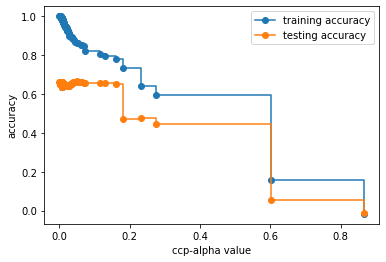

In [14]:
dtrs = []
for ccp_alpha in ccp_alphas:
    dtr = DTR(
        criterion="mae",
        splitter="random",
        random_state=0,
        ccp_alpha=ccp_alpha
    )
    dtr.fit(x_train, y_train)
    dtrs.append(dtr)

train_scores, test_scores = [model.score(x_train, y_train) for model in dtrs], [model.score(x_test, y_test) for model in dtrs]

fig, ax = plt.subplots()
ax.set_xlabel("ccp-alpha value")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, label="training accuracy", marker='o', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, label="testing accuracy", marker='o', drawstyle='steps-post')
plt.legend()
plt.show()

In [15]:
import numpy as np
best_dtr = dtrs[np.argmax(test_scores)]
best_ccp = ccp_alphas[np.argmax(test_scores)]
print(best_ccp, best_dtr.score(x_test, y_test))

print("Depth of the tree hence built is:", best_dtr.get_depth())
print("Number of leaves are:", best_dtr.get_n_leaves())

0.05118733509234846 0.6661952949883823
Depth of the tree hence built is: 6
Number of leaves are: 17


we can see a major improvement in the depth(19 to 6) and number of leaves(363 to 17) for the pruned tree, and also a minor accuracy improvement

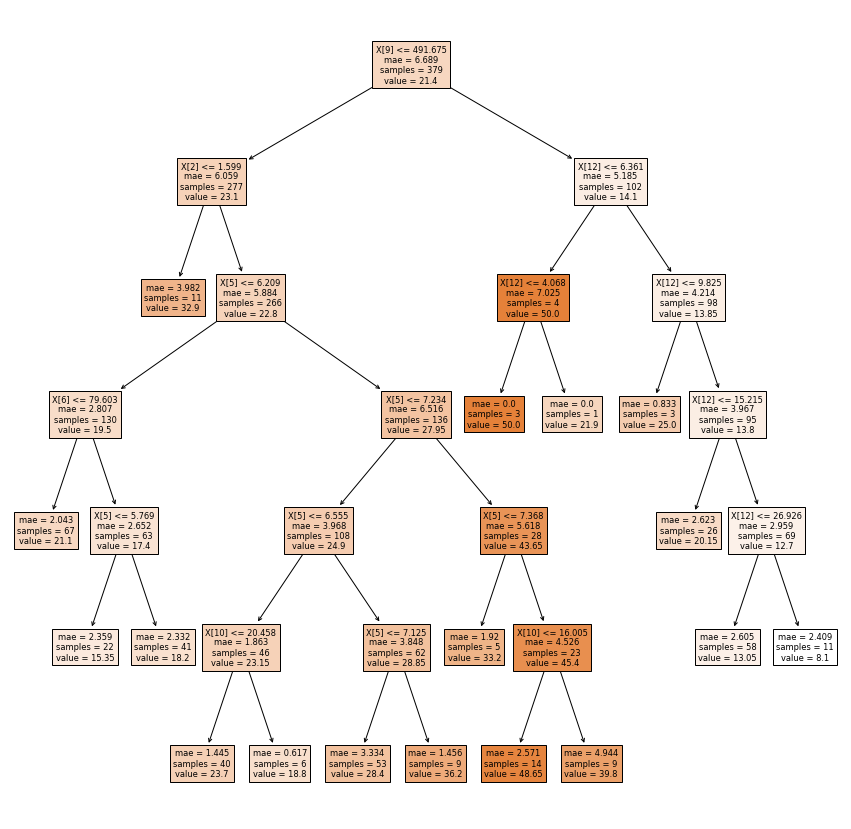

In [16]:
plt.figure(figsize=(15, 15))
tree.plot_tree(best_dtr, filled=True)
plt.show()

# Importance of decision trees

1. interpretable, which means that after we build the model, we can also make inferences about our data, not just predictions. In sklearn, we can do this using the `.feature_importances_ attribute`.

2. 

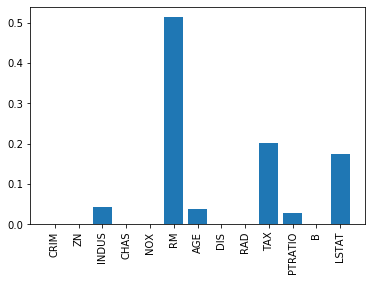

In [17]:
%matplotlib inline
plt.bar([i for i in range(len(best_dtr.feature_importances_))], best_dtr.feature_importances_)
plt.xticks(np.arange(len(best_dtr.feature_importances_)), labels=load_boston().feature_names, rotation='vertical')
plt.show()

# Interview Questions

1. Impact of outliers on decision trees
    
    1. 
    
2. usually have low bias and high variance
    
    1. at full depth training of any decision tree model, w.r.t. a training dataset, the decision tree tends to get overfitted, since the act of it being drawn to its full depth means that we are specifically trying to make our model rote-learn the outputs from training samples, rather than actually learning the relations between various features at hand, and their impact on the output.
    
    2. how to reduce this high variance?
    
3. which all libraries used to create the decision trees?
    
    1. 